In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [7]:
with open('/home/xiaoxinyu/data/0628train/Tx_ch7_power0','rb') as file:
    signal,symb,param = pickle.load(file)

In [58]:
f'$\\omega_i$'

'$\\omega_i$'

Text(0.5, 0, 'Frequency (Hz)')

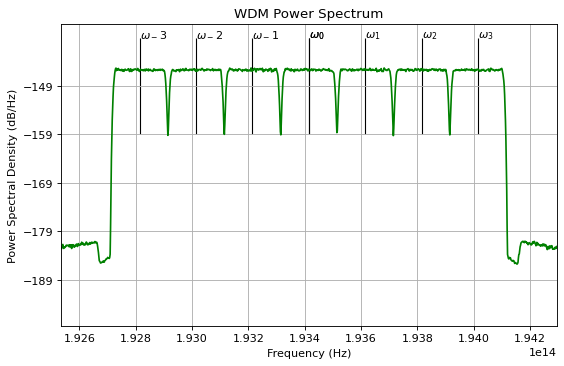

In [60]:
plt.figure(figsize=(8,5),dpi=80)
plt.psd(signal[0,:,0], NFFT=4096, Fs=param.Rs*param.SpS, Fc=param.Fc,sides='twosided',color='g')

plt.text(x=param.Fc, y=-139, s=r'$\omega_0$')
plt.arrow(x=param.Fc,y=-139,dx=0,dy=-20)

for i in range(-3,4):
    plt.text(x=param.Fc + i*param.freqSpac, y=-139, s=f'$\\omega_{i}$')
    plt.arrow(x=param.Fc + i*param.freqSpac,y=-139,dx=0,dy=-20)


plt.xlim([param.Fc - 4*220e9, param.Fc + 4*220e9])
plt.title('WDM Power Spectrum')
plt.xlabel('Frequency (Hz)')

Text(0, 0.5, 'MSE loss')

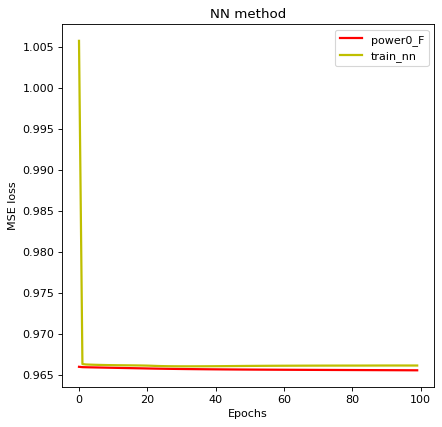

In [44]:

import re
with open('loading/nn_test','rb') as file:
    loss_dict= pickle.load(file)

#plt.plot(loss_test0[::2],label='test_nn')
plt.figure(figsize=(6,6),dpi=80)
colors=['r','y','k','m','c','b']

k = 0
for f in loss_dict.keys():
    if f != 'train':
        i = re.search('power',f).start(0)
        plt.plot(loss_dict[f], label=f[i:i+8], color=colors[k], linewidth=2)
        k = k + 1

batchs = int(len(loss_dict['train'])/len(loss_dict[f]))
plt.plot(loss_dict['train'][::batchs], label='train_nn',color=colors[k], linewidth=2)
plt.legend()
plt.title('NN method')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')

In [ ]:
# Train set: power range [-9,6]
# Test setL: power range [-10,10]

Text(0, 0.5, 'MSE loss')

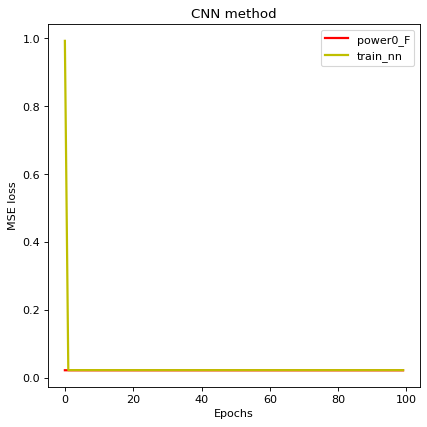

In [43]:
import re
with open('loading/cntest27','rb') as file:
    loss_dict= pickle.load(file)

#plt.plot(loss_test0[::2],label='test_nn')
plt.figure(figsize=(6,6),dpi=80)
colors=['r','y','k','m','c','b']

k = 0
for f in loss_dict.keys():
    if f != 'train':
        i = re.search('power',f).start(0)
        plt.plot(loss_dict[f], label=f[i:i+8], color=colors[k], linewidth=2)
        k = k + 1

batchs = int(len(loss_dict['train'])/len(loss_dict[f]))
plt.plot(loss_dict['train'][::batchs], label='train_nn',color=colors[k], linewidth=2)
plt.legend()
plt.title('CNN method')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')

Text(0, 0.5, 'MSE loss')

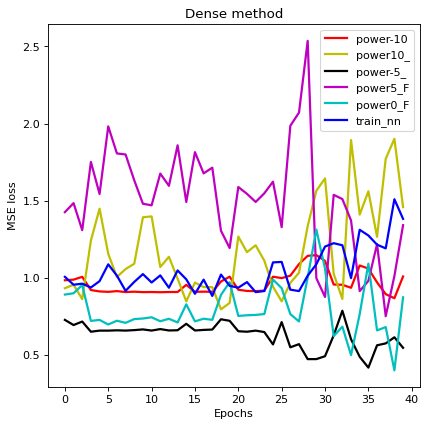

In [30]:
import re
with open('loading/dense_step5','rb') as file:
    loss_dict= pickle.load(file)

#plt.plot(loss_test0[::2],label='test_nn')
plt.figure(figsize=(6,6),dpi=80)
colors=['r','y','k','m','c','b']

k = 0
for f in loss_dict.keys():
    if f != 'train':
        i = re.search('power',f).start(0)
        plt.plot(loss_dict[f], label=f[i:i+8], color=colors[k], linewidth=2)
        k = k + 1

batchs = int(len(loss_dict['train'])/len(loss_dict[f]))
plt.plot(loss_dict['train'][::batchs], label='train_nn',color=colors[k], linewidth=2)
plt.legend()
plt.title('Dense method')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')

Text(0, 0.5, 'MSE loss')

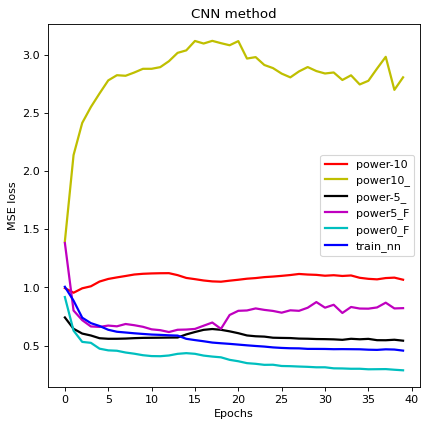

In [25]:
import re
with open('loading/cnn_step3','rb') as file:
    loss_dict= pickle.load(file)

#plt.plot(loss_test0[::2],label='test_nn')
plt.figure(figsize=(6,6),dpi=80)
colors=['r','y','k','m','c','b']

k = 0
for f in loss_dict.keys():
    if f != 'train':
        i = re.search('power',f).start(0)
        plt.plot(loss_dict[f], label=f[i:i+8], color=colors[k], linewidth=2)
        k = k + 1

batchs = int(len(loss_dict['train'])/len(loss_dict[f]))
plt.plot(loss_dict['train'][::batchs], label='train_nn',color=colors[k], linewidth=2)
plt.legend()
plt.title('CNN method')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')

In [25]:
import re
s = '123456power_10_1234'
a = re.search('power',s)

In [44]:
s[6:6+9]

'power_10_'

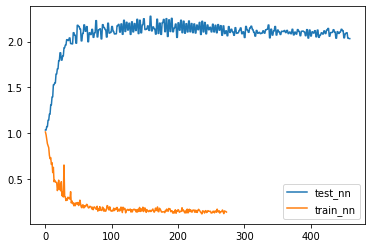

In [2]:
loss_train0 = np.load('loading/Loss_train_0531.npy')
loss_test0 = np.load('loading/Loss_test_0531.npy')

plt.plot(loss_test0,label='test_nn')
plt.plot(loss_train0[::200], label='train_nn')
plt.legend()

In [6]:
from optical_flax.layers import MetaSSFM, GRU_DBP, fdbp
from optical_flax.utils import show_tree
import optical_flax.base as base
from optical_flax.initializers import fdbp_init
from optical_flax.utils import realize
from optical_flax.layers import DSP_Model
from commplax.module import core
import flax.linen as nn
import optax
from commplax import optim 
from functools import partial
Signal = core.Signal

k = 2   # additional mimo symbols
steps = 3
Nlen= 2000
Nstep = 1000
sps=8
d_init, n_init = fdbp_init(data_sml.a, xi=1.1, steps=steps, domain='frequency')
Net = partial(MetaSSFM,steps=steps, d_init=d_init, n_init=n_init, dtaps=Nlen*sps, ntaps=1, discard=sps*(500-k), H_width=(20,20,20),xi_width=(60,60,60))
# Net = partial(NNSSFM,steps=steps, d_init=d_init, n_init=n_init, dtaps=Nlen*sps, ntaps=1, discard=sps*(500-k))
Net_vmap = nn.vmap(Net, variable_axes={'params':None}, split_rngs={'params':None})

class MyDBP(nn.Module):

    @nn.compact
    def __call__(self, signal):
        x, t = Net_vmap()(signal)
        # x [batch, N, 2]
        x = nn.Conv(features=2,kernel_size=((2*k+1)*sps,),strides=(sps,), param_dtype=jnp.complex64,dtype=jnp.complex64, padding='valid')(x)
        return Signal(x,t)
    
net = MyDBP()
LDBP = realize(net)

In [27]:
import pickle
with open('loading/param/state_epoch200','rb') as file:
    a = pickle.load(file)
    var = a['param']
    l = a['loss_val']

In [35]:
import jax.numpy as jnp
def loss(var, xi, yi): 
    x = LDBP.apply(var, Signal(yi))
    return jnp.mean(jnp.abs(x.val - xi[:,500:1500,:])**2)

#test_path = '/home/xiaoxinyu/data/0531test/dataset_sps8/data_ch11_power0_FO0_lw0'
test_path = '/home/xiaoxinyu/data/0531train/dataset_sps8/data_ch13_power0_FO0_lw0'
yi,xi = take_data(test_path, Nlen, Nstep)
loss(var, xi,yi)

DeviceArray(0.04222878, dtype=float32)

## NN Traning

In [1]:
## Training Meta_DBP Model on a signal 
from optical_flax.layers import MetaSSFM, GRU_DBP, fdbp, NNSSFM
from optical_flax.utils import show_tree
import optical_flax.base as base
from optical_flax.initializers import fdbp_init
from optical_flax.utils import realize
from optical_flax.layers import DSP_Model
from commplax.module import core
import flax.linen as nn
import optax
from commplax import optim 
Signal = core.Signal

k = 2   # additional mimo symbols
steps = 3
Nlen= 2000
Nstep = 1000
sps=8
d_init, n_init = fdbp_init(data_sml.a, xi=1.1, steps=steps, domain='frequency')
# Net = partial(MetaSSFM,steps=steps, d_init=d_init, n_init=n_init, dtaps=Nlen*sps, ntaps=1, discard=sps*(500-k), H_width=(20,20,20),xi_width=(60,60,60))
Net = partial(NNSSFM,steps=steps, d_init=d_init, n_init=n_init, dtaps=Nlen*sps, ntaps=1, discard=sps*(500-k))
Net_vmap = nn.vmap(Net, variable_axes={'params':None}, split_rngs={'params':None})

class MyDBP(nn.Module):

    @nn.compact
    def __call__(self, signal):
        x, t = Net_vmap()(signal)
        # x [batch, N, 2]
        x = nn.Conv(features=2,kernel_size=((2*k+1)*sps,),strides=(sps,), param_dtype=jnp.complex64,dtype=jnp.complex64, padding='valid')(x)
        return Signal(x,t)
    
net = MyDBP()
LDBP = realize(net)
var0 = LDBP.init(rd.PRNGKey(2121), Signal(y_example))
print(show_tree(var0))


tx = optax.adam(learning_rate=1e-3)

def loss(var, xi, yi): 
    x = LDBP.apply(var, Signal(yi))
    return jnp.mean(jnp.abs(x.val - xi[:,500:1500,:])**2)

@jax.jit
def update_param(var, opt_state, xi, yi):
    loss_val, grads = jax.value_and_grad(loss)(var, xi,yi)
    updates, opt_state = tx.update(grads, opt_state)
    var = optax.apply_updates(var, updates)
    return var, opt_state, loss_val

Loss = []
Loss_test = []
opt_state0 = tx.init(var0)

test_path = '/home/xiaoxinyu/data/0531test/dataset_sps8/data_ch11_power0_FO0_lw0'
from tqdm import tqdm
for t in range(100):
    batch_size = 200
    DL = DataLoader(x_data,y_data,200,jax.random.PRNGKey(0))
    for i,(xi,yi) in enumerate(DL):
        var0, opt_state0, l = update_param(var0, opt_state0, xi, yi)
        Loss.append(l)
        print(f'Epoch {t} -- batch {i} -- train loss {l}')
    
    yi,xi = take_data(test_path, Nlen, Nstep)
    l = loss(var0, xi, yi)
    Loss_test.append(l)
    with open(f'loading/param_NN/state_epoch{t}', 'wb') as file:
        pickle.dump({'param':var0, 'loss_val':l}, file)
    print(f'########### Epoch {t} -- Test loss {l}  ##############')

    Loss_test.append(l)


np.save('loading/Loss_train_0531_NN',Loss)
np.save('loading/Loss_test_0531_NN',Loss_test)

NameError: name 'data_sml' is not defined

: 

In [2]:
import numpy as np
import jax
import jax.random as rd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from optical_flax.core import parameters
from optical_flax.generate_data import Rx_data, get_data
import pickle
from functools import partial


train_path = '/home/xiaoxinyu/data/0508'
test_path = '/home/xiaoxinyu/data/0517'
key = rd.PRNGKey(233)

def Rx(key, path, sps, FO, lw):
    with open(path+'/Tx_ch7', 'rb') as file:
        sigWDM_tx, symbWDM, param = pickle.load(file)

    with open(path+'/Channel_ch7', 'rb') as file:
        sigWDM, paramCh = pickle.load(file)

    data, paramRx, noise = Rx_data(key, sigWDM, symbWDM, sps, param, paramCh, FO, lw)
    return data, noise


def batch_data(data, Nlen=2000, Nstep=1000):
    from commplax.xop import frame
    sps = data.a['sps']
    y = jax.vmap(frame, in_axes=(0,None,None), out_axes=0)(data.y, Nlen*sps, Nstep*sps).reshape([-1,Nlen*sps,2])
    x = jax.vmap(frame, in_axes=(0,None,None), out_axes=0)(data.x, Nlen, Nstep).reshape([-1,Nlen,2])
    return y,x

data_train, n0 = Rx(rd.PRNGKey(123), train_path, sps=8, FO=0, lw=0)
data_test, n1 = Rx(rd.PRNGKey(234), test_path, sps=8, FO=0, lw=0)
y,x = batch_data(data_train)
y_test, x_test = batch_data(data_test)

In [3]:
from optical_flax.initializers import fdbp_init
steps=3
d_init, n_init = fdbp_init(data_train.a, xi=1.1, steps=steps, domain='frequency')
H = d_init(rd.PRNGKey(0), (y.shape[1],))
with open(train_path+'/Channel_ch7', 'rb') as file:
    sigWDM, paramCh = pickle.load(file)

## Initialization

In [4]:
import scipy.constants as const
Ltotal = paramCh.Ltotal 
alpha  = paramCh.alpha  
D      = paramCh.D      
gamma  = paramCh.gamma 
Fc     = paramCh.Fc     
amp    = paramCh.amp   
NF     = paramCh.NF

# channel parameters  
c_kms = const.c/1e3 # speed of light (vacuum) in km/s
λ  = c_kms/Fc
α  = alpha/(10*np.log10(np.exp(1)))
β2 = -(D*λ**2)/(2*np.pi*c_kms)
γ  = gamma

# generate frequency axis 
Nfft = y.shape[1]
ω = 2*np.pi*data_train.a['samplerate']*torch.fft.fftfreq(Nfft)

hz = Ltotal/steps

# define linear operator
from torch.fft import fft, ifft, fftshift
linOperator = torch.exp(-1j*(β2/2)*(ω**2)*hz/2)
H1 = fft(fftshift(ifft(linOperator)))

In [1]:
import numpy as np
import jax
import jax.random as rd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from optical_flax.core import parameters
from optical_flax.generate_data import Rx_data, get_data
import pickle
from functools import partial


train_path = '/home/xiaoxinyu/data/0508'
test_path = '/home/xiaoxinyu/data/0517'
key = rd.PRNGKey(233)

k=2
Nlen=2000
Nstep=1000
sps=8
steps=3
Nfft = Nlen*sps

def batch_data(data, Nlen=2000, Nstep=1000):
    from commplax.xop import frame
    sps = data.a['sps']
    y = jax.vmap(frame, in_axes=(0,None,None), out_axes=0)(data.y, Nlen*sps, Nstep*sps).reshape([-1,Nlen*sps,2])
    x = jax.vmap(frame, in_axes=(0,None,None), out_axes=0)(data.x, Nlen, Nstep).reshape([-1,Nlen,2])
    return y,x

## load data
with open('loading/data','rb') as file:
    data = pickle.load(file)
    data_train=data['data_train']
    data_test = data['data_test']
y,x = batch_data(data_train)
y_test, x_test = batch_data(data_test)

import torch
from optical_torch import NNFiber,MetaFiber

tsf = lambda x: torch.tensor(jax.device_get(x))

y = tsf(y)
x = tsf(x)
y_test = tsf(y_test)
x_test = tsf(x_test)

In [5]:
from optical_flax.initializers import fdbp_init
d_init, n_init = fdbp_init(data_train.a, xi=1.1, steps=steps, domain='frequency')
H = d_init(key, (Nfft,))
phi = n_init(key, (1,))
H = tsf(H).to(torch.complex64)
phi = tsf(phi)
net = MetaFiber(steps, Nfft, H, phi)


/home/xiaoxinyu/optic/optical_torch.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.init_value = torch.tensor(init_value)


In [7]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
def loss(xi,yi):
    y1 = net(yi)
    return torch.mean(torch.abs(y1[:,500:1500,:]-xi[:,500:1500,:])**2)

L1 = []
L2 = []

for k in range(20):
    for i in range(10):
        xi = x[99*i:99*(i+1),...]
        yi = y[99*i:99*(i+1),...]
        optimizer.zero_grad()
        l = loss(xi,yi)
        l.backward()
        optimizer.step()
        print(f'Epoch {k} batch {i}, train loss: {l.item()}')
        L1.append(l.item())
    xi = x_test[99*4:99*(4+1),...]
    yi = y_test[99*4:99*(4+1),...]
    l = loss(xi,yi)
    L2.append(l.item())
    print(f'Epoch {k} , test loss: {l.item()}')


/home/xiaoxinyu/.conda/envs/commplax/lib/python3.8/site-packages/torch/autograd/__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch 0 batch 0, train loss: 1.1312988996505737
Epoch 0 batch 1, train loss: 1.1099587678909302
Epoch 0 batch 2, train loss: 1.0933045148849487
Epoch 0 batch 3, train loss: 1.067493200302124
Epoch 0 batch 4, train loss: 1.0266751050949097
Epoch 0 batch 5, train loss: 0.9587307572364807
Epoch 0 batch 6, train loss: 0.8913986086845398
Epoch 0 batch 7, train loss: 0.8346951007843018
Epoch 0 batch 8, train loss: 0.8031662106513977
Epoch 0 batch 9, train loss: 0.7835255861282349
Epoch 0 , test loss: 0.7134757041931152
Epoch 1 batch 0, train loss: 0.7254504561424255
Epoch 1 batch 1, train loss: 0.642279863357544
Epoch 1 batch 2, train loss: 0.5290530920028687
Epoch 1 batch 3, train loss: 0.5527743101119995
Epoch 1 batch 4, train loss: 0.550528883934021
Epoch 1 batch 5, train loss: 0.5346676707267761
Epoch 1 batch 6, train loss: 0.48101648688316345
Epoch 1 batch 7, train loss: 0.3274921774864197
Epoch 1 batch 8, train loss: 0.7335978746414185
Epoch 1 batch 9, train loss: 0.28149306774139404
E

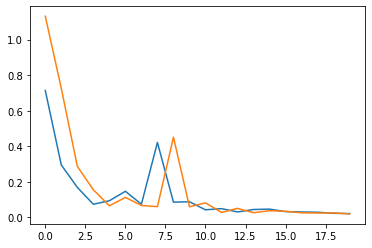

In [11]:
plt.plot(L2)
plt.plot(L1[::10])

In [12]:
from optical_flax.initializers import fdbp_init
d_init, n_init = fdbp_init(data_train.a, xi=1.1, steps=steps, domain='frequency')
H = d_init(key, (Nfft,))
phi = n_init(key, (1,))
H = tsf(H).to(torch.complex64)
phi = tsf(phi)
net = NNFiber(steps, Nfft, H, phi)


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
def loss(xi,yi):
    y1 = net(yi)
    return torch.mean(torch.abs(y1[:,500:1500,:]-xi[:,500:1500,:])**2)

L3 = []
L4 = []

for k in range(20):
    for i in range(10):
        xi = x[99*i:99*(i+1),...]
        yi = y[99*i:99*(i+1),...]
        optimizer.zero_grad()
        l = loss(xi,yi)
        l.backward()
        optimizer.step()
        print(f'Epoch {k} batch {i}, train loss: {l.item()}')
        L3.append(l.item())
    xi = x_test[99*4:99*(4+1),...]
    yi = y_test[99*4:99*(4+1),...]
    l = loss(xi,yi)
    L4.append(l.item())
    print(f'Epoch {k} , test loss: {l.item()}')



Epoch 0 batch 0, train loss: 1.078957200050354
Epoch 0 batch 1, train loss: 1.058835506439209
Epoch 0 batch 2, train loss: 1.0400203466415405
Epoch 0 batch 3, train loss: 1.0194129943847656
Epoch 0 batch 4, train loss: 0.9989660382270813
Epoch 0 batch 5, train loss: 0.9760991334915161
Epoch 0 batch 6, train loss: 0.9534439444541931
Epoch 0 batch 7, train loss: 0.928375780582428
Epoch 0 batch 8, train loss: 0.9059794545173645
Epoch 0 batch 9, train loss: 0.8796471953392029
Epoch 0 , test loss: 0.8527536392211914
Epoch 1 batch 0, train loss: 0.8518342971801758
Epoch 1 batch 1, train loss: 0.8232899904251099
Epoch 1 batch 2, train loss: 0.7944707274436951
Epoch 1 batch 3, train loss: 0.7631447315216064
Epoch 1 batch 4, train loss: 0.7290400862693787
Epoch 1 batch 5, train loss: 0.691736102104187
Epoch 1 batch 6, train loss: 0.6537886261940002
Epoch 1 batch 7, train loss: 0.6123553514480591
Epoch 1 batch 8, train loss: 0.5714407563209534
Epoch 1 batch 9, train loss: 0.5270082950592041
Epoc

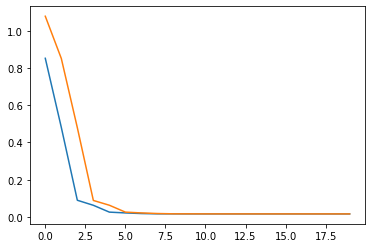

: 

In [13]:
plt.plot(L4)
plt.plot(L3[::10])